    Analysis
    Trend 1: Rides in rural cities appear to be more expensive, but much less frequent.
    Trend 2: Cities make up a larger percentage of the total revenue.
    Trend 3: Suburban cities tent to fall in between the urban and rural in all metrics.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
df = pd.DataFrame.merge(ride_data,city_data, on = 'city' , how = 'left')

# Display the data table for preview
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
# Create dataframe for charts :
df_avgfare = pd.DataFrame({'AvgFare':df.groupby(["city","driver_count","type"]).fare.mean()}).reset_index("driver_count")
df_ridecount = pd.DataFrame({'RideCount':df.groupby(["city","driver_count","type"]).ride_id.count()}).reset_index("city")
#display frame
   #df_avgfare
   #df_ridecount

# Merge Dataframes and create final with with stats:

df_chart =   pd.DataFrame.merge(df_avgfare, df_ridecount, on =["city","driver_count","type"] , how = 'inner').reset_index()
df_chart = df_chart.sort_values("type")
df_chart = df_chart.rename(columns={"type":"City Types"} )
df_chart['sizes'] = df_chart.driver_count * 10
df_chart.head()

,City Types,city,driver_count,AvgFare,RideCount,sizes
100,Rural,Taylorhaven,1,42.263333,6,10
57,Rural,Newtonview,1,36.745000,4,10
55,Rural,New Ryantown,2,43.278333,6,20
92,Rural,South Jennifer,7,35.264286,7,70
95,Rural,South Marychester,1,41.870000,8,10


Bubble Plot of Ride Sharing Data

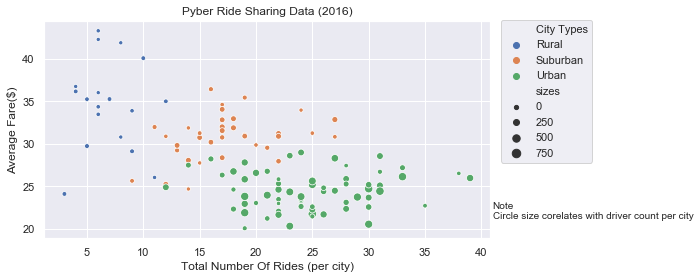

In [3]:
# Plot and export : chart type - 'scatter'

plt.figure(figsize=(8,4))
plt.subplots_adjust(hspace=0.1)

#Used 'seaborn' module to plot scatter chart by City Types
g=sns.scatterplot(x='RideCount', y='AvgFare', hue ='City Types', size = 'sizes', data = df_chart, legend = 'brief' )

# Adding chart titles and labels
plt.ylabel('Average Fare($)')
plt.xlabel('Total Number Of Rides (per city)')
plt.title('Pyber Ride Sharing Data (2016)')   
g.text( 41,20,"Note\nCircle size corelates with driver count per city\n")
g.legend(loc= 'upper right', bbox_to_anchor = (1.24,1.03))
plt.axis(aspect='image')
plt.savefig("pyber_starter_scatter.png", dpi=150, bbox_inches = 'tight')
plt.show()

Total Fares by City Type

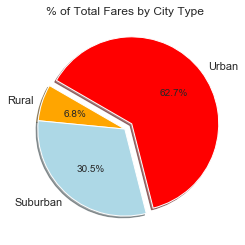

In [4]:
# Calculate stats and plot chart (Type : Pie)
# Calculate Type Percents # Build Pie Chart # Save Figure

TotalFare = sum(df.fare)
df_fp = pd.DataFrame({'fp':df.groupby(["type"]).fare.sum()})/TotalFare * 100
df_fp = df_fp.round(1).reset_index()
df_fp = pd.DataFrame(df_fp)
df_fp.set_index('type')
labelsp = df_fp.type
plt.title("% of Total Fares by City Type")
explode = (0,0,0.1)
colors = [ 'orange', 'lightblue','red']

plt.pie(df_fp.fp,labels = labelsp,explode=explode, startangle=150,  autopct="%1.1f%%",  shadow=True, colors = colors)

plt.savefig("pyber_starter_pie_fare.png",dpi=150)
plt.show()

 Total Rides by City Type

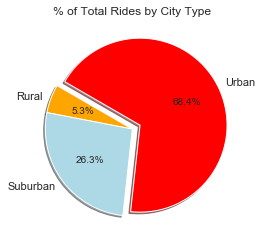

In [5]:
# Calculate stats and plot chart (Type : Pie)
# Calculate Ride Percents # Build Pie Chart # Save Figure

TotalRide = sum(df_chart.RideCount)
df_rp = pd.DataFrame({'rp':df_chart.groupby(["City Types"]).RideCount.sum()})/TotalRide * 100
df_rp = df_rp.round(1).reset_index()
df_rp = pd.DataFrame(df_rp)
df_rp.set_index('City Types')
plt.title("% of Total Rides by City Type")
explode = (0,0,0.1)
colors = [ 'orange', 'lightblue','red']

plt.pie(df_rp.rp,labels = labelsp,explode=explode, startangle=150,  autopct="%1.1f%%",  shadow=True, colors = colors)

plt.savefig("pyber_starter_pie_ride.png",dpi=150)
plt.show()

Total Drivers by City Type

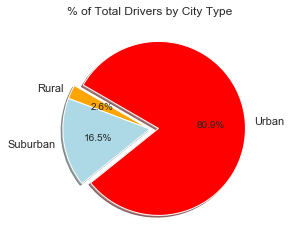

In [6]:
# Calculate stats as asked for and plot chart (Type : Pie)
# Calculate Driver Percents # Build Pie Chart # Save Figure

TotalDrivers = sum(df_chart.driver_count)
df_dc = pd.DataFrame({'dc':df_chart.groupby(["City Types"]).driver_count.sum()})/TotalDrivers * 100
df_dc = df_dc.round(1).reset_index()
df_dc = pd.DataFrame(df_dc)
df_dc.set_index('City Types')
plt.title("% of Total Drivers by City Type")
explode = (0,0,0.1)
colors = [ 'orange', 'lightblue','red']

plt.pie(df_dc.dc,labels = labelsp,explode=explode, startangle=150,  autopct="%1.1f%%",  shadow=True, colors = colors)
plt.savefig("pyber_starter_pie_driver.png",dpi=150)
plt.show()